# Análise exploratória de dados

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from IPython.display import display, Markdown, Latex

In [3]:
df = pd.read_excel("../data/raw/data.xls", header=1)
# df.to_csv('data.csv', index=False, header=False)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## 1. Descrição dos dados

In [3]:
display(Markdown("- Quantidade de Instâncias: " + str(df.shape[0])))
display(Markdown("- Quantidade de Atributos: " + str(df.shape[1])))
display(Markdown("- Variaveis e Seus Tipos:"))
display(df.dtypes)
display(Markdown("- Quantidade de Valores Faltantes:"))
display(df.isnull().sum())

- Quantidade de Instâncias: 30000

- Quantidade de Atributos: 25

- Variaveis e Seus Tipos:

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

- Quantidade de Valores Faltantes:

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

## 2. Perguntas de partida e hipóteses

1. Há indícios de que existe uma correlação entre o valor do crédito concedido e o risco de inadiplência?
2. Há indícios de que existe uma correlação entre o gênero do indivíduo e o risco de inadiplência?
3. Há indícios de que existe uma correlação entre o grau de escolaridade do indivíduo e o risco de inadiplência?
4. Há indícios de que existe uma correlação entre o estado civil do indivíduo e o risco de inadiplência?
5. Há indícios de que existe uma correlação entre a idade do indivíduo e o risco de inadiplência?
6. Há indícios de que existe uma correlação entre o status de pagamentos anteriores e o risco de inadiplência?
7. Há indícios de que existe uma correlação entre os saldos bancários anteriores e o risco de inadiplência?
8. Há indícios de que existe uma correlação entre o valor de pagamentos anteriores e o risco de inadiplência?

## 3. Insights

1. Os dados dão indícios de que existe uma correlação positiva entre o valor do crédito concedido e a inadiplência

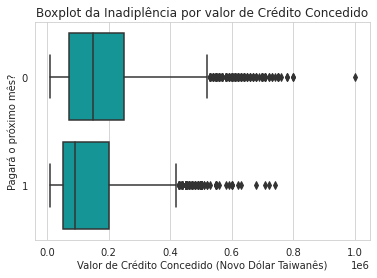

In [4]:
sns.set_style("whitegrid")

ax = sns.boxplot(data=df, x="LIMIT_BAL", y="default payment next month", orient="h", color="#00AAAA")

plt.title("Boxplot da Inadiplência por valor de Crédito Concedido")
plt.xlabel("Valor de Crédito Concedido (Novo Dólar Taiwanês)")
plt.ylabel("Pagará o próximo mês?")

display(Markdown("1. Os dados dão indícios de que existe uma correlação positiva entre o valor do crédito concedido e a inadiplência"))


2. Os dados dão indícios de que existe uma correlação entre o gênero do indivíduo e a inadiplência

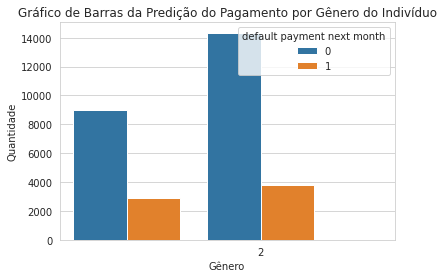

In [6]:
# plt.figure(figsize=(3,5))
sns.countplot(data=df, x="SEX", hue="default payment next month")
plt.xticks([1,2])

plt.title("Gráfico de Barras da Predição do Pagamento por Gênero do Indivíduo")
plt.xlabel("Gênero")
plt.ylabel("Quantidade")

display(Markdown("2. Os dados dão indícios de que existe uma correlação entre o gênero do indivíduo e a inadiplência"))

3. Os dados dão indícios de que existe uma correlação entre a escolaridade do indivíduo e a inadiplência

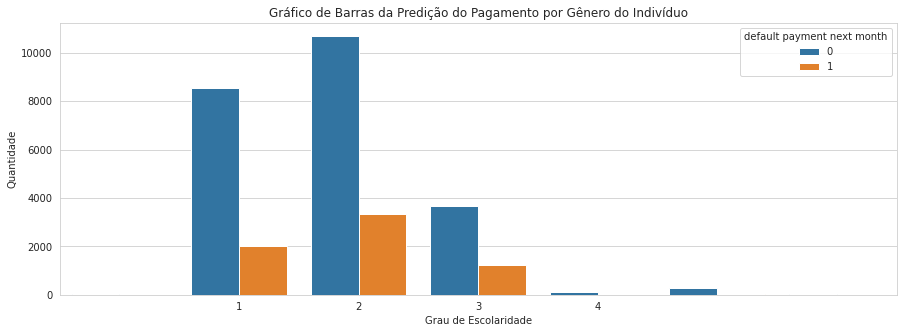

In [7]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x="EDUCATION", hue="default payment next month")
plt.xticks([1,2,3,4])

plt.title("Gráfico de Barras da Predição do Pagamento por Gênero do Indivíduo")
plt.xlabel("Grau de Escolaridade")
plt.ylabel("Quantidade")

display(Markdown("3. Os dados dão indícios de que existe uma correlação entre a escolaridade do indivíduo e a inadiplência"))

4. Os dados dão indícios de que existe uma correlação entre o estado civil do indivíduo e a inadiplência

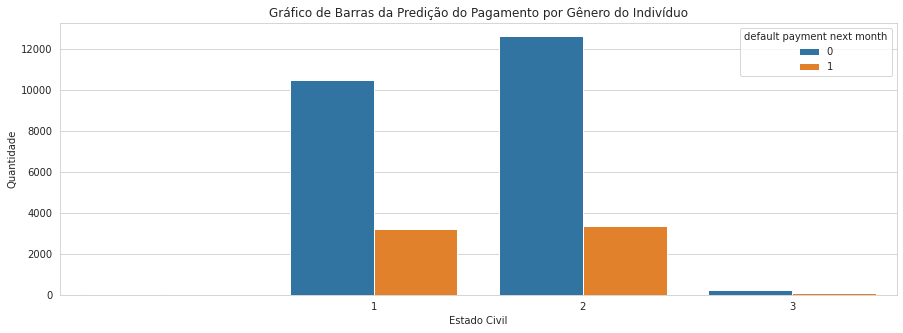

In [8]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x="MARRIAGE", hue="default payment next month")
plt.xticks([1,2,3])

plt.title("Gráfico de Barras da Predição do Pagamento por Gênero do Indivíduo")
plt.xlabel("Estado Civil")
plt.ylabel("Quantidade")

display(Markdown("4. Os dados dão indícios de que existe uma correlação entre o estado civil do indivíduo e a inadiplência"))

5. Não há indícios de que existe uma correlação entre a idade do indivíduo e a inadiplência

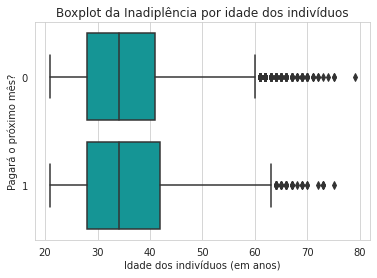

In [9]:
ax = sns.boxplot(data=df, x="AGE", y="default payment next month", orient="h", color="#00AAAA")

plt.title("Boxplot da Inadiplência por idade dos indivíduos")
plt.xlabel("Idade dos indivíduos (em anos)")
plt.ylabel("Pagará o próximo mês?")

display(Markdown("5. Não há indícios de que existe uma correlação entre a idade do indivíduo e a inadiplência"))

6. Os dados dão indícios de que existe uma correlação entre o status de pagamentos anteriores e a inadiplência

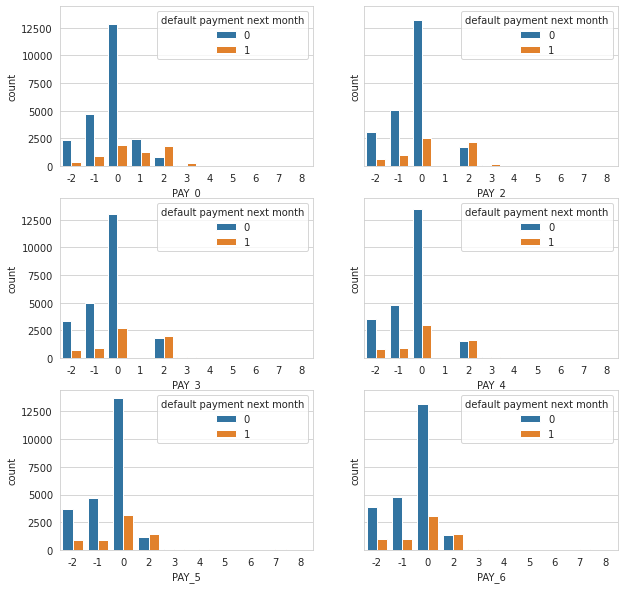

In [12]:
fig, axes = plt.subplots(3, 2, figsize=(10,10), sharey=True)
sns.countplot(ax=axes[0,0], data=df, x="PAY_0", hue="default payment next month")
sns.countplot(ax=axes[0,1], data=df, x="PAY_2", hue="default payment next month")
sns.countplot(ax=axes[1,0], data=df, x="PAY_3", hue="default payment next month")
sns.countplot(ax=axes[1,1], data=df, x="PAY_4", hue="default payment next month")
sns.countplot(ax=axes[2,0], data=df, x="PAY_5", hue="default payment next month")
sns.countplot(ax=axes[2,1], data=df, x="PAY_6", hue="default payment next month")


display(Markdown("6. Os dados dão indícios de que existe uma correlação entre o status de pagamentos anteriores e a inadiplência"))

7. Não há indícios de que existe uma correlação entre os saldos bancários anteriores e a inadiplência

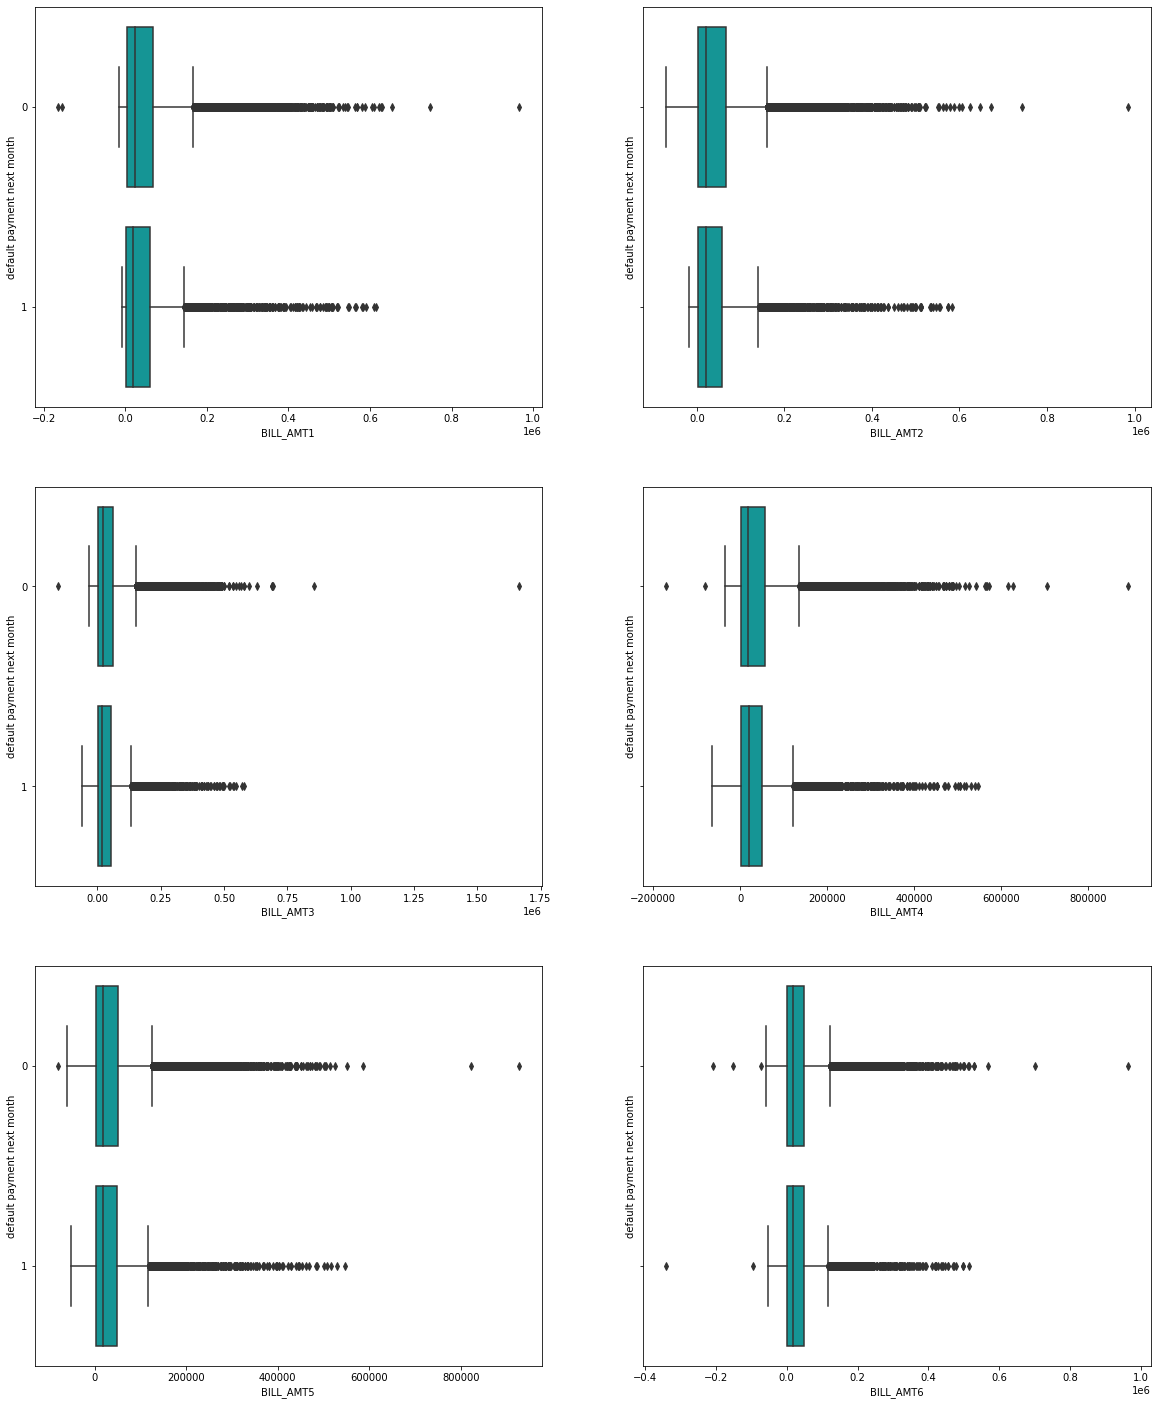

In [13]:
fig, axes = plt.subplots(3, 2, figsize=(20,25), sharey=True)
sns.boxplot(ax=axes[0,0], data=df, x="BILL_AMT1", y="default payment next month", orient="h", color="#00AAAA")
sns.boxplot(ax=axes[0,1], data=df, x="BILL_AMT2", y="default payment next month", orient="h", color="#00AAAA")
sns.boxplot(ax=axes[1,0], data=df, x="BILL_AMT3", y="default payment next month", orient="h", color="#00AAAA")
sns.boxplot(ax=axes[1,1], data=df, x="BILL_AMT4", y="default payment next month", orient="h", color="#00AAAA")
sns.boxplot(ax=axes[2,0], data=df, x="BILL_AMT5", y="default payment next month", orient="h", color="#00AAAA")
sns.boxplot(ax=axes[2,1], data=df, x="BILL_AMT6", y="default payment next month", orient="h", color="#00AAAA")

display(Markdown("7. Não há indícios de que existe uma correlação entre os saldos bancários anteriores e a inadiplência"))

8. Inconclusivo

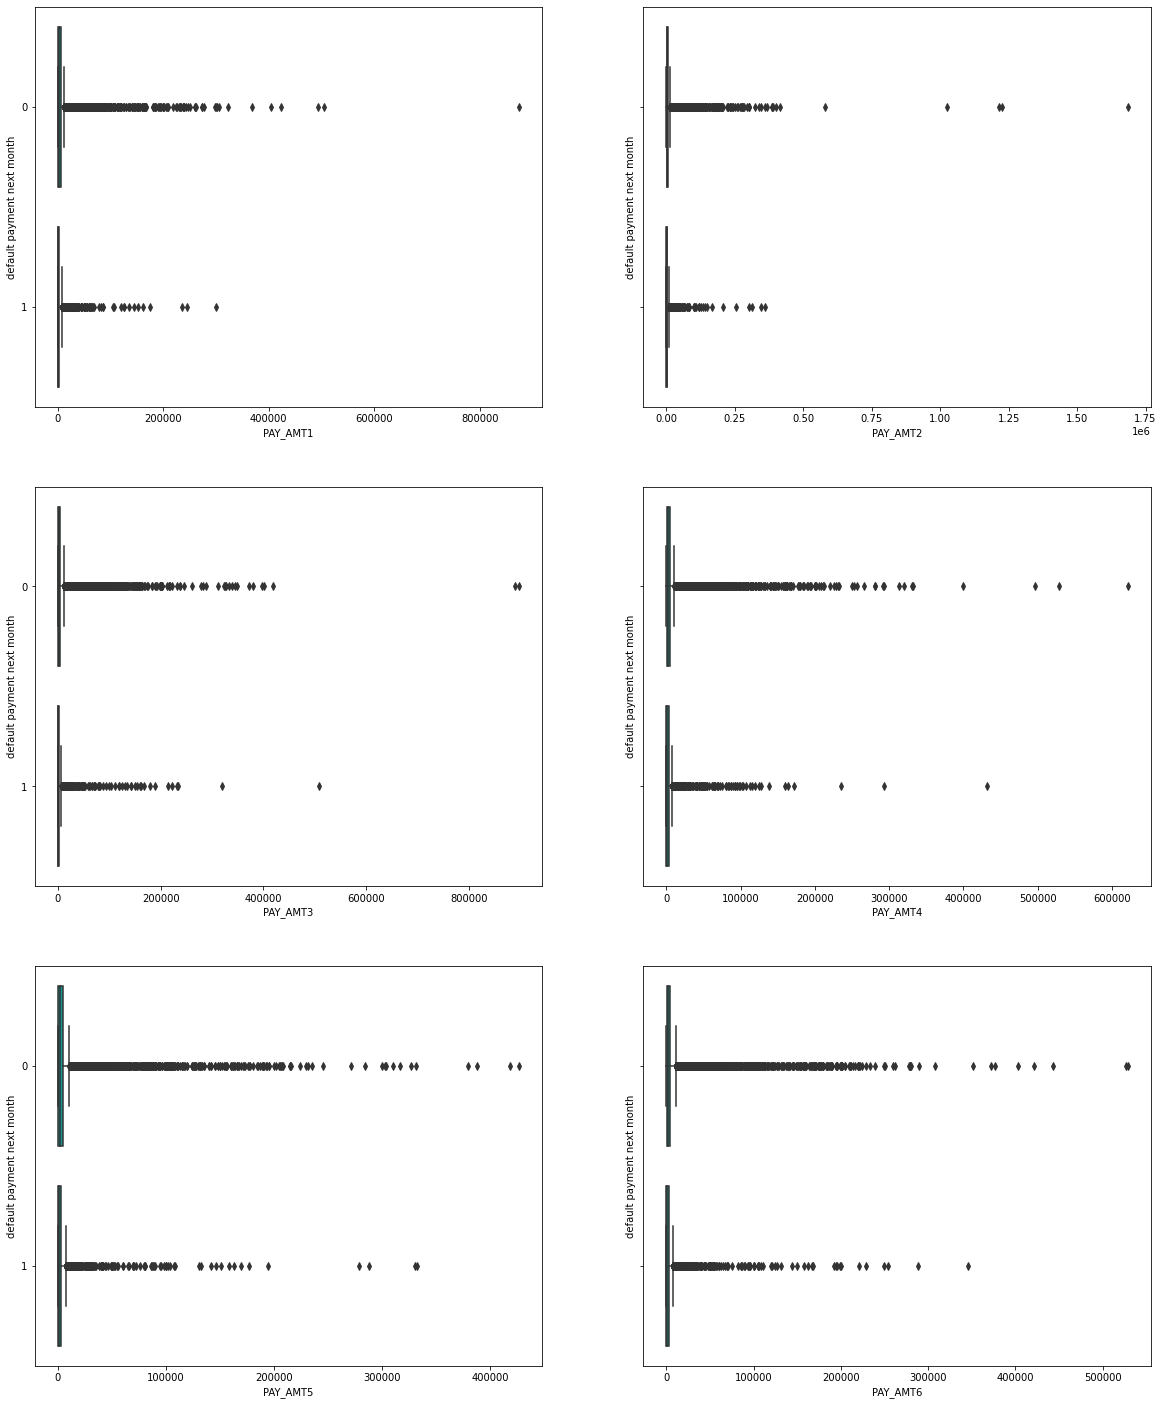

In [18]:
fig, axes = plt.subplots(3, 2, figsize=(20,25), sharey=True)
sns.boxplot(ax=axes[0,0], data=df, x="PAY_AMT1", y="default payment next month", orient="h", color="#00AAAA")
sns.boxplot(ax=axes[0,1], data=df, x="PAY_AMT2", y="default payment next month", orient="h", color="#00AAAA")
sns.boxplot(ax=axes[1,0], data=df, x="PAY_AMT3", y="default payment next month", orient="h", color="#00AAAA")
sns.boxplot(ax=axes[1,1], data=df, x="PAY_AMT4", y="default payment next month", orient="h", color="#00AAAA")
sns.boxplot(ax=axes[2,0], data=df, x="PAY_AMT5", y="default payment next month", orient="h", color="#00AAAA")
sns.boxplot(ax=axes[2,1], data=df, x="PAY_AMT6", y="default payment next month", orient="h", color="#00AAAA")

display(Markdown("8. Inconclusivo"))